## Exploratory Data Analysis

In [1]:
# importing of libraries
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import os,sys
sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.eda import EDA
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams["figure.figsize"] = (12, 8)
pd.set_option('display.max_columns', None)

In [2]:
# reading the csv file
train = pd.read_csv("../data/training.csv",index_col=False)
test = pd.read_csv("../data/testing.csv",index_col=False)

In [3]:
eda_train = EDA(train)
eda_test = EDA(test)

## General statistics 

In [4]:
eda_train.descriptive_stats(size=True)

(324326, 23)

In [5]:
eda_test.descriptive_stats(size=True)

(14832, 22)

In [6]:
# descriptive statistics that summarize the central tendency, dispersion of the df's numerical columns
eda_train.descriptive_stats(describe=True)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Day,Month,Year,DayOfYear,WeekOfYear
count,324326.000,324326.000,324326.000,324326.000,324326.000,324326.000,324326.000,324326.000,324326.000,324326.000,324326.000,324326.000,324326.000,324326.000,324326.000,324326.000,324326.000,324326.000
mean,532.986,3.999,5003.222,511.323,0.826,0.381,0.175,3437.229,7.191,2007.997,1.000,20.853,2011.789,15.699,5.749,2013.828,159.306,23.206
std,304.028,1.997,2934.681,298.974,0.379,0.486,0.380,3871.940,3.251,7.319,0.000,12.519,1.607,8.786,3.304,0.787,100.931,14.330
min,2.000,1.000,0.000,0.000,0.000,0.000,0.000,40.000,1.000,1900.000,1.000,1.000,2009.000,1.000,1.000,2013.000,1.000,1.000
25%,276.000,2.000,3527.000,369.000,1.000,0.000,0.000,600.000,4.000,2005.000,1.000,13.000,2011.000,8.000,3.000,2013.000,75.000,11.000
50%,563.000,4.000,5467.000,557.000,1.000,0.000,0.000,2230.000,7.000,2009.000,1.000,18.000,2012.000,16.000,5.000,2014.000,149.000,22.000
75%,776.000,6.000,6979.750,700.000,1.000,1.000,0.000,4590.000,10.000,2012.000,1.000,35.000,2013.000,23.000,8.000,2014.000,236.000,34.000
max,1062.000,7.000,11121.000,1165.000,1.000,1.000,1.000,17110.000,12.000,2014.000,1.000,40.000,2014.000,31.000,12.000,2015.000,365.000,52.000


In [7]:
eda_test.descriptive_stats(describe=True)

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Day,Month,Year,DayOfYear,WeekOfYear
count,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000
mean,19578.925,546.078,3.979,0.850,0.396,0.470,3050.939,7.100,2008.078,1.000,23.272,2011.877,13.521,8.354,2015.000,236.500,34.646
std,10984.912,300.078,2.016,0.357,0.489,0.499,3306.823,3.217,8.033,0.000,13.506,1.634,8.449,0.478,0.000,13.854,2.016
min,2.000,3.000,1.000,0.000,0.000,0.000,40.000,1.000,1900.000,1.000,1.000,2009.000,1.000,8.000,2015.000,213.000,31.000
25%,10272.500,302.000,2.000,1.000,0.000,0.000,600.000,4.000,2006.000,1.000,13.000,2011.000,6.750,8.000,2015.000,224.750,33.000
50%,20541.500,590.000,4.000,1.000,0.000,0.000,2070.000,7.000,2010.000,1.000,22.000,2012.000,12.500,8.000,2015.000,236.500,35.000
75%,28769.250,778.000,6.000,1.000,1.000,1.000,4140.000,10.000,2012.000,1.000,37.000,2013.000,19.250,9.000,2015.000,248.250,36.000
max,39041.000,1071.000,7.000,1.000,1.000,1.000,16180.000,12.000,2014.000,1.000,45.000,2014.000,31.000,9.000,2015.000,260.000,38.000


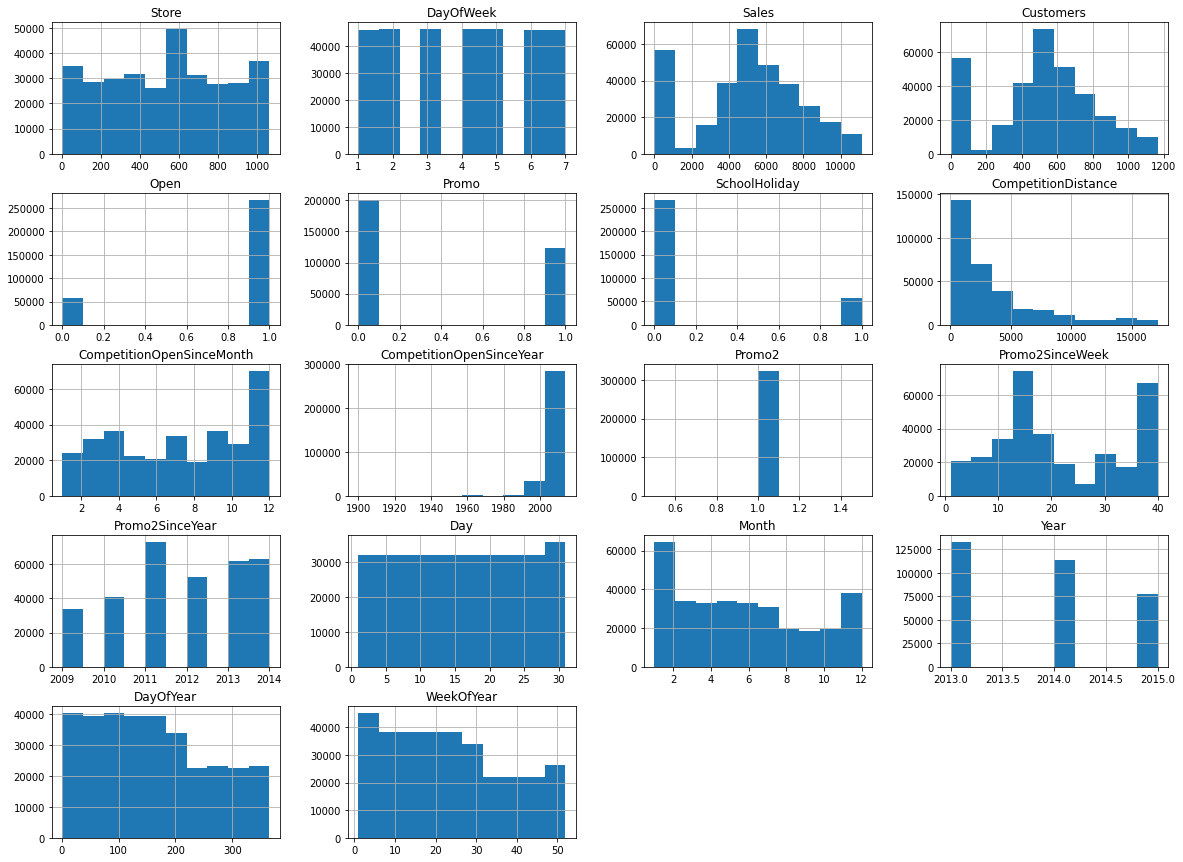

In [8]:
eda_train.plot_distributions()

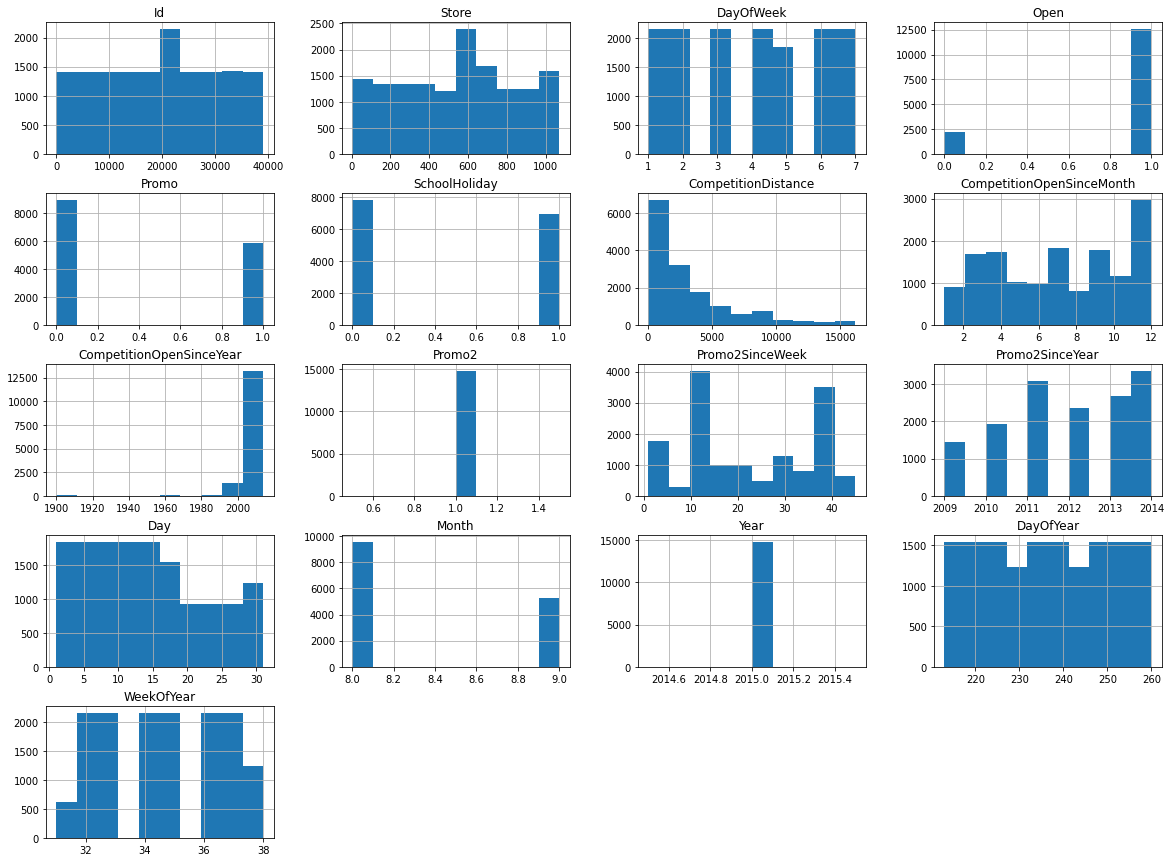

In [10]:
eda_test.plot_distributions()

No they are not similar, we see that there is differences in:
- day of week-slight difference in 4-5 in test set
- school holiday - difference in number of ones in test set
- promo 2 since week - has lower values in between the peaks in the test set
- promo 2 since year - has slight difference in year 2013 and 2014 
- day - has lower days towards the end in the test set
- month - has no values in between the peaks  in the test set
- year - centered only on one peak that is 2015
- day of year - has lower values towards the end in the train set
- week of year - has downward trend in the training set, while in the test set it tries to be consistent
- no customers and sales columns in test set

In [11]:
# unique value counts
counts_df = df['date'].value_counts()
counts_df

2020-07-03    2015
2020-07-09    1208
2020-07-08    1198
2020-07-04     903
2020-07-10     893
2020-07-05     890
2020-07-06     490
2020-07-07     480
Name: date, dtype: int64

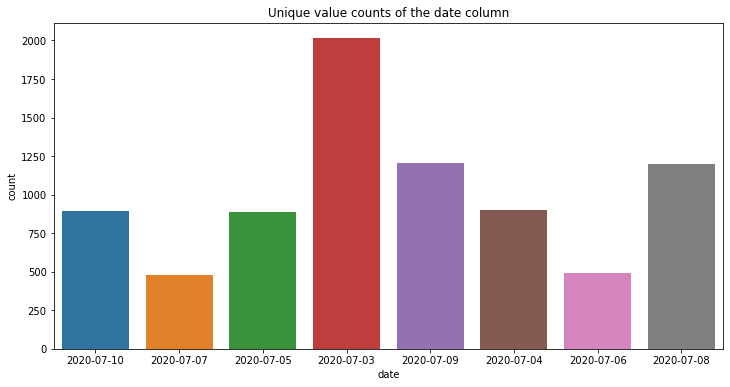

In [12]:
date_plot = eda.plot_counts("date",type="univariate")

For the dates we notice that 2020-07-03 has the most frequency with 2015, 
and the lowest count was on 2020-07-07 with a count of 480, 
that is just 4 days later, so we see that it 


In [13]:
# unique value counts of devices
counts_df = df['device_make'].value_counts()
counts_df

Generic Smartphone     4743
iPhone                  433
Samsung SM-G960F        203
Samsung SM-G973F        154
Samsung SM-G950F        148
                       ... 
Samsung SM-A505F          1
D5803                     1
Samsung SM-G6100          1
HTC M10h                  1
XiaoMi Redmi Note 5       1
Name: device_make, Length: 270, dtype: int64

In [14]:
df['device_make'].nunique()

270

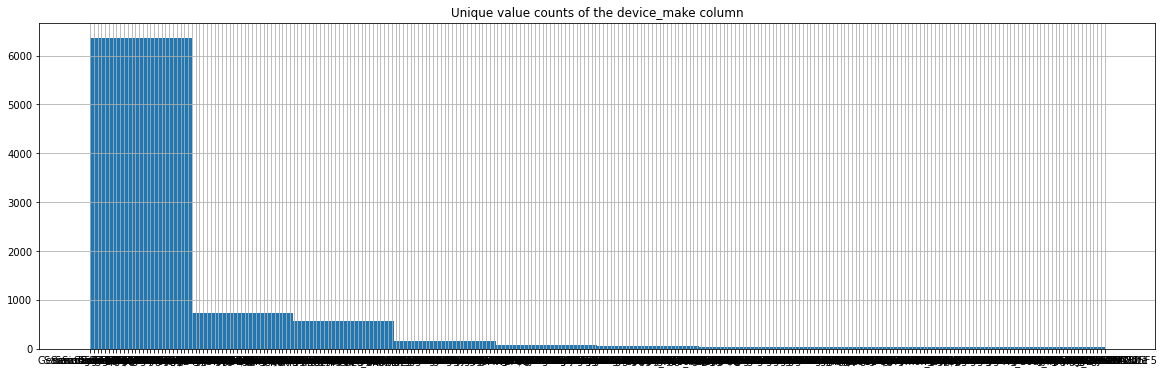

In [27]:
# eda.plot_counts("device_make",type="univariate")
plt.figure(figsize=(20, 6))
df['device_make'].hist()
plt.title(f'Unique value counts of the device_make column');
plt.show()

For the devices we notices that most of the members are using the generic smartphone
with a count of 4743 and the lowest is the XiaoMi Redmi Note 5 with only 1 person using it


In [28]:
# unique value counts of the platforms used
counts_df = df['platform_os'].value_counts()
counts_df

6    7648
5     428
7       1
Name: platform_os, dtype: int64

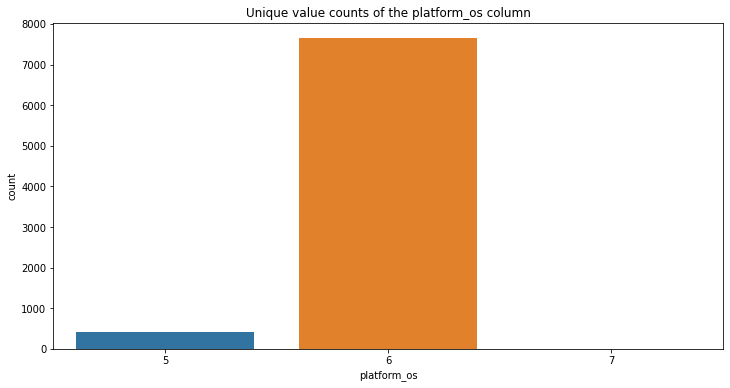

In [29]:
platform_plot = eda.plot_counts("platform_os",type="univariate")

For the platform os we notice that 6 is the one with the highest count of 7648 and 7 the lowest having only 1 member.


In [30]:
# unique value counts of the browser
counts_df = df['browser'].value_counts()
counts_df

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Chrome                           3
Pinterest                        3
Opera Mobile                     3
Opera Mini                       1
Edge Mobile                      1
Android                          1
Firefox Mobile                   1
Puffin                           1
Name: browser, dtype: int64

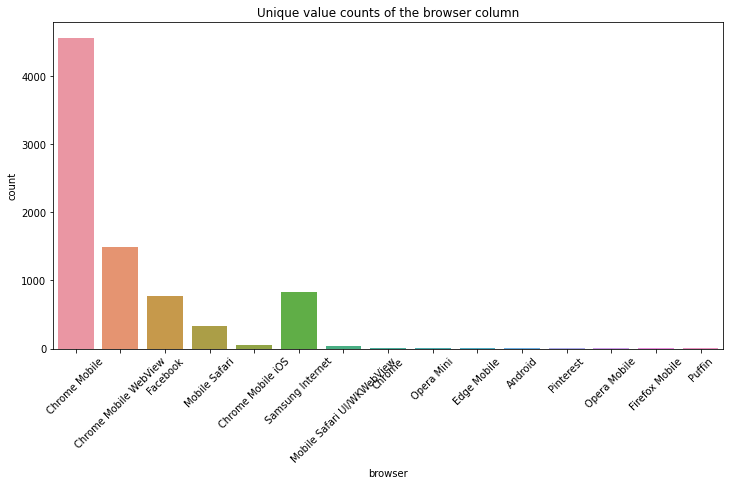

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="browser")
plt.title('Unique value counts of the browser column')
plt.xticks(rotation=45)
plt.show()

For the browsers we can see that most of the people are using the chrome OS 
with a count of 4554 and the least used browser is puffin with only 1 user


In [21]:
# unique value counts of people who are aware of the company
counts_df = df['yes'].value_counts()
counts_df

0    7505
1     572
Name: yes, dtype: int64

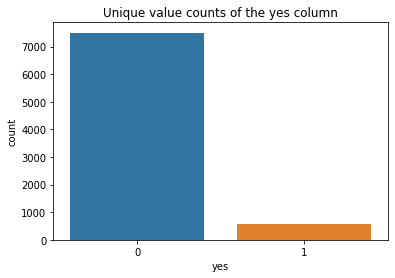

In [30]:
sns.countplot(data=df, x="yes")
plt.title('Unique value counts of the yes column')
plt.show()

In [23]:
# unique value counts of the people who are not aware of the company
counts_df = df['no'].value_counts()
counts_df

0    7406
1     671
Name: no, dtype: int64

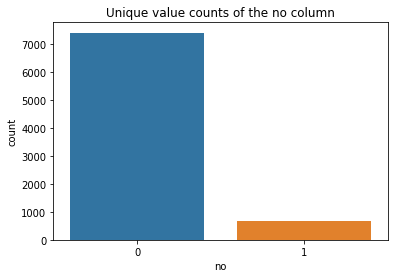

In [31]:
sns.countplot(data=df, x="no")
plt.title('Unique value counts of the no column')
plt.show()

Throughout the experiment we notice that most of the people responded by saying no with a 
count of 671 in total than those who said yes with a count of 572, that is from both of the groups exposed and control


## Bivariate Analysis

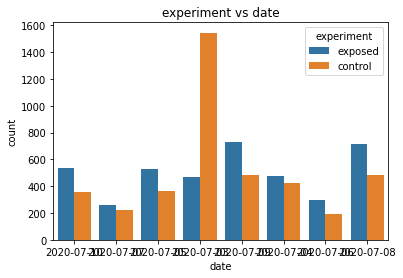

In [14]:
# Experiment with Date
experiment_date = eda.plot_counts("experiment","date","bivariate")

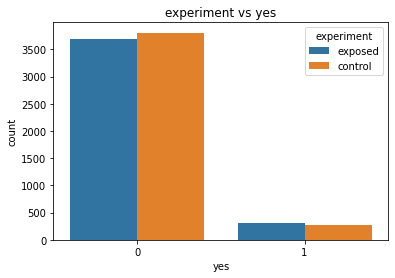

In [15]:
experiment_yes=eda.plot_counts("experiment","yes","bivariate")

## Correlation Analysis

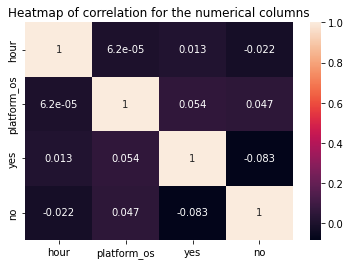

In [16]:
correlations = eda.correlation_analysis()